In [3]:
import numpy as np
import matplotlib.pyplot as plt
i=complex(0,1)

In [42]:
def eigenvalues(a_by_l_B,n=20):
    t=1

    H=np.zeros(shape=(n*n,n*n),dtype=np.complex_)
    for l in range(0,n*n):
        t_prime=np.exp(i*2*np.pi*(l%n)*a_by_l_B)
        if (l%n!=0 and (l+1)%n!=0 and l>=n and l<n*n-n):
            H[l][l+1]=-t
            H[l][l-1]=-t
            H[l][l+n]=-t_prime
            H[l][l-n]=np.conjugate(-t_prime)
        if(l%n==0):
            H[l][l+1]=-t
            if (l!=0):
                H[l][l-n]=np.conjugate(-t_prime)
            if(l!=n*n-n):
                H[l][l+n]=-t_prime
        if((l+1)%n==0):
            H[l][l-1]=-t
            if (l!=n-1):
                H[l][l-n]=np.conjugate(-t_prime)
            if(l!=n*n-1):
                H[l][l+n]=-t_prime
        if(l<n-1 and 0<l):
            H[l][l+1]=-t
            H[l][l-1]=-t
            H[l][l+n]=-t_prime
        if(l<n*n-1 and n*n-n<l):
            H[l][l+1]=-t
            H[l][l-1]=-t
            H[l][l-n]=-t_prime
    eigvals,_=np.linalg.eig(H)
    return eigvals
        

In [44]:
eig_ranges=[]

a_by_l_B_range = np.linspace(0,1,50)
for j in range(0,len(a_by_l_B_range)):
    eig_ranges.append(eigenvalues(a_by_l_B_range[j],n=30))

Text(0, 0.5, 'E/t')

<Figure size 432x288 with 0 Axes>

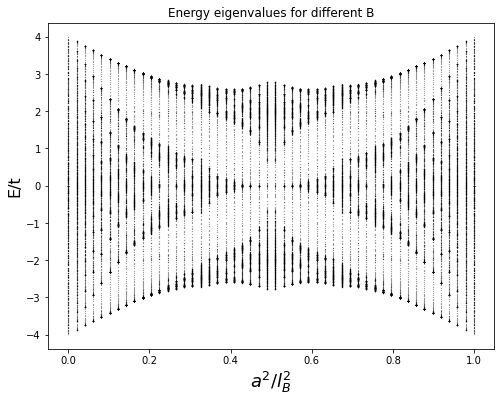

In [48]:




fig = plt.figure()

fig.suptitle('test title', fontsize=20)

plt.figure(figsize=(8,6))
for k in range(0,len(a_by_l_B_range)):
    x=np.full(np.shape(eig_ranges[k]),a_by_l_B_range[k])
    plt.scatter(x,np.real(eig_ranges[k]), marker='.', color='k', s=0.09)
    
plt.title("Energy eigenvalues for different B")
plt.xlabel('$a^2/l_{B}^2$', fontsize=18)
plt.ylabel('E/t', fontsize=16)
#fig.savefig('test.jpg')


In [172]:
from scipy.linalg import ishermitian as isHerm 
from matplotlib.pyplot import figure
import matplotlib as mpl
from numba import jit
import numpy as np

In [329]:
t=100
Beta=np.array([[-t,0],[0,t]],dtype=np.complex_)

I_2=np.array([[1,0],[0,1]],dtype=np.complex_)
    
N=15


In [346]:
sigma_z=np.array([[1,0],[0,-1]])

In [448]:
Delta=1
mu=30
eta=0.01
T=0.001         

In [335]:
A=np.array([[2,0],[0,-2]])
B=np.array([[0,-i],[i,0]])
print(A*5)

[[ 10   0]
 [  0 -10]]


In [628]:
def greens_function_E(E=0,phi=0,Delta=1,mu=30,eta=0.01,N=15):
    
    Alpha_R=np.array([[2*t-mu,Delta],[Delta,-2*t+mu]],dtype=np.complex_)
    Alpha_L=np.array([[2*t-mu,Delta*np.exp(i*phi)],[Delta*np.exp(-i*phi),-2*t+mu]],dtype=np.complex_)
    
    H = np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    I_N=np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    for k in range(0,N):
        for l in range(0,N):
            if(k==l):
                H[2*k][2*l]= 2*t-mu
                H[2*k+1][2*l+1]= -2*t+mu
            if(l==k+1 or k==l+1):
                H[2*k][2*l]= -t
                H[2*k+1][2*l+1]= t
                
    for k in range(0,2*N):
        I_N[k][k]=1
    
   
    g_R=np.array([[0,0],[0,0]],dtype=np.complex_)
    g_R_prev=g_R
    g_R=np.linalg.inv((E+i*eta)*I_2 - Alpha_R -\
                           np.matmul(np.matmul( np.transpose(np.conjugate(Beta)),g_R_prev),Beta))
    
    g_L=np.array([[0,0],[0,0]],dtype=np.complex_)
    g_L_prev=g_L
    g_L=np.linalg.inv((E+i*eta)*I_2 - Alpha_L -\
                           np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L_prev),Beta))
    
    
    while(trace_dist(g_R,g_R_prev)>10**-10):
        g_R_prev=g_R
        g_R=np.linalg.inv((E+i*eta)*I_2 - Alpha_R -\
                            np.matmul(np.matmul( np.transpose(np.conjugate(Beta)),g_R_prev),Beta))  
    while(trace_dist(g_L,g_L_prev)>10**-10):
        g_L_prev=g_L
        g_L=np.linalg.inv((E+i*eta)*I_2 - Alpha_L -\
                            np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L_prev),Beta))

        
    Sigma_R= np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_R),Beta)
    Sigma_L= np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L),Beta)
    
    Sigma_R_N =np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    Sigma_R_N[0][0],Sigma_R_N[0][1],Sigma_R_N[1][0],Sigma_R_N[1][1]=\
                          Sigma_R[0,0],Sigma_R[0,1],Sigma_R[1,0],Sigma_R[1,1]
    
    Sigma_L_N =np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    Sigma_L_N[2*N-2][2*N-2],Sigma_L_N[2*N-2][2*N-1],Sigma_L_N[2*N-1][2*N-2],Sigma_L_N[2*N-1][2*N-1]=\
                          Sigma_L[0,0],Sigma_L[0,1],Sigma_L[1,0],Sigma_L[1,1]
    
    Sigma_N = Sigma_R_N + Sigma_L_N
                          
    #print((E+i*eta)*I_N - H- Sigma_N)
    g_normal = np.linalg.inv((E+i*eta)*I_N - H - Sigma_N)
    #print("g_normal",isHerm(g_normal))
    #print(g_normal)
    
   # Sigma_IN =i*(Sigma_N -np.transpose(np.conjugate(Sigma_N)))
    
    
    #G_n = np.matmul(np.matmul(g_normal,Sigma_IN),np.transpose(np.conjugate(g_normal)))
    
    
    
    #print("G_n ", isHerm(G_n*H_N))
    Current= np.matmul(np.transpose(np.conjugate(g_normal)),np.transpose(np.conjugate(Sigma_R_N)))\
                               - np.matmul( g_normal,Sigma_R_N)
    #print(H_N*G_n==G_n*H_N)
    current_I =0
    
    for k in range(0,N):
        current_I+= Current[2*k][2*k]-Current[2*k+1][2*k+1]    
    
                          
    DOS=i*np.trace(g_normal-np.transpose(np.conjugate(g_normal)))  
    #print(DOS)
    
    
    
    return g_normal, current_I,DOS
        

In [492]:
def fermi(E,mu,T):
    return 1/(np.exp((E-mu)/T)+1) 
    

In [ ]:
def trace_dist(A,B):
    C=A-B
    return  np.trace(np.matmul(C,np.transpose(np.conjugate(C))) )

In [549]:
phi_range=np.linspace(0,2*np.pi,100)
E_range=np.linspace(-1,1,50)
Current_range=np.zeros(shape=(len(phi_range),len(E_range)),dtype=np.complex_)
DOS_range=np.zeros(shape=(len(phi_range),len(E_range)),dtype=np.complex_)

for l in range(0,len(phi_range)):
    for k in range(0,len(E_range)):
        G,Current_range[l,k],DOS_range[l,k] = greens_function_E(E=E_range[k],phi=phi_range[l])
    print(l)

    
    #print(DOS_range[l])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


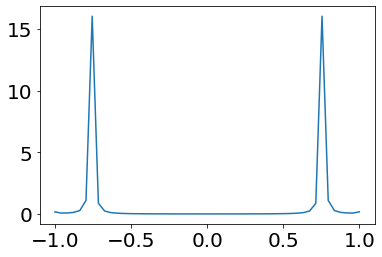

In [551]:
max_index_1=[]
max_index_2=[]
for k in range(0,len(phi_range)):
    max_index_1.append(np.argmax(DOS_range[k][0:int(len(E_range)/2)]))
    max_index_2.append(np.argmax(DOS_range[k][int(len(E_range)/2):]))
max_index_2_act=np.add(max_index_2,int(len(E_range)/2))    
max_index_1_act=max_index_1

In [552]:
print(max_index_2)

[24, 24, 24, 24, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 20, 20, 19, 19, 19, 18, 18, 17, 17, 16, 16, 15, 14, 14, 13, 13, 12, 12, 11, 10, 10, 9, 8, 8, 7, 7, 6, 5, 5, 4, 3, 3, 2, 1, 1, 0, 0, 1, 1, 2, 3, 3, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10, 11, 12, 12, 13, 13, 14, 14, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24]


In [559]:
DOS_range_prime=np.real((np.reshape(DOS_range,(len(phi_range),len(E_range)))))





AttributeError: 'function' object has no attribute 'help'

In [560]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

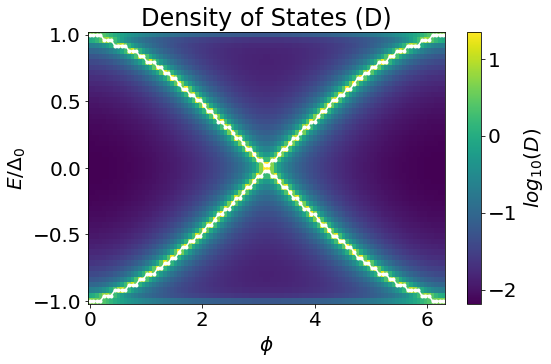

In [632]:
cmap = plt.get_cmap('viridis',len(DOS_range_prime.flatten()))
figure(figsize = (8,5 ))
px = plt.pcolormesh(phi_range,E_range,np.log10(np.real(np.transpose(DOS_range_prime))))
plt.ylabel(r"$E/\Delta_{0}$")
plt.xlabel(r"$ \phi $")
plt.title("Density of States (D)")
#plt.plot(phi_range,E_range,'w--',markersize='20')
norm = mpl.colors.Normalize(vmin=min((np.log10(DOS_range_prime.flatten()))), \
                            vmax=max((np.log10(DOS_range_prime.flatten())))) 
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.plot(phi_range,E_range[max_index_1_act],marker='.',c='white')
plt.plot(phi_range,E_range[max_index_2_act],marker='.',c='white')
plt.colorbar(sm,label="$log_{10} (D )$")
plt.show()



Text(0.5, 1.0, 'DOS and Current at $\\phi=1.206$')

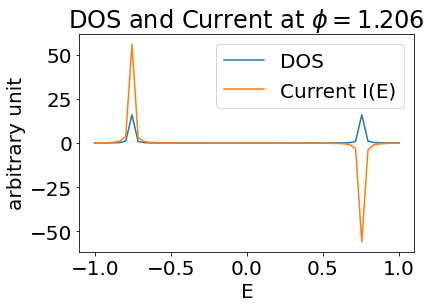

In [728]:
plt.plot(E_range,np.abs(DOS_range[19]), label=f"DOS")
plt.plot(E_range,np.real(Current_range[19][:]),label=f"Current I(E)")
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("arbitrary unit")
plt.xlabel("E")
plt.title(f"DOS and Current at $\phi={np.round(phi_range[19],3)}$")


In [734]:
T=
currents_phi=np.zeros(shape=(len(phi_range)),dtype=np.complex_)

for l in range(0,len(phi_range)):
    for k in range(0,len(E_range)):
        currents_phi[l]+= Current_range[l][k]* fermi(E_range[k],T)
    

In [732]:
def fermi(E,T,mu=0):
     return 1/(np.exp((E-mu)/T)+1)

In [704]:
currents_phi[24]

(10.734223586926381-56.3898250544274j)

Text(0.5, 1.0, 'Current $I_\\phi$ vs $\\phi$ at T =30')

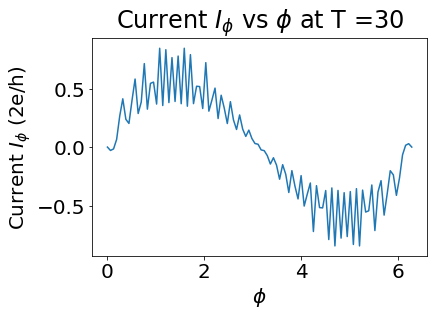

In [735]:
plt.plot(phi_range,np.real(currents_phi))
plt.ylabel(r"Current $I_{\phi}$ (2e/h)")
plt.xlabel(r"$\phi$")
plt.title(f"Current $I_\phi$ vs $\phi$ at T ={T}")

In [624]:
#rough

C:\Users\REET\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


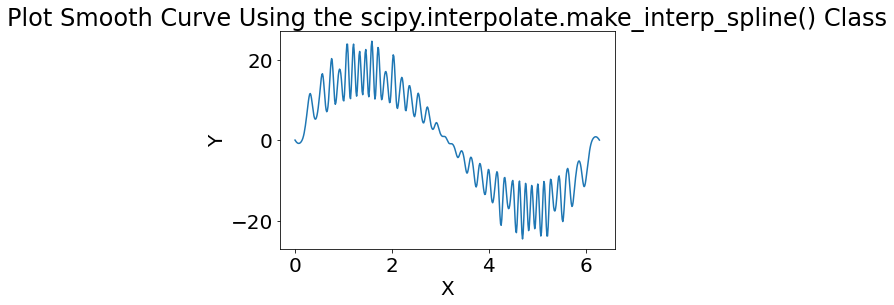

In [623]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
 
X_Y_Spline = make_interp_spline(phi_range, currents_phi)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(phi_range.min(), phi_range.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

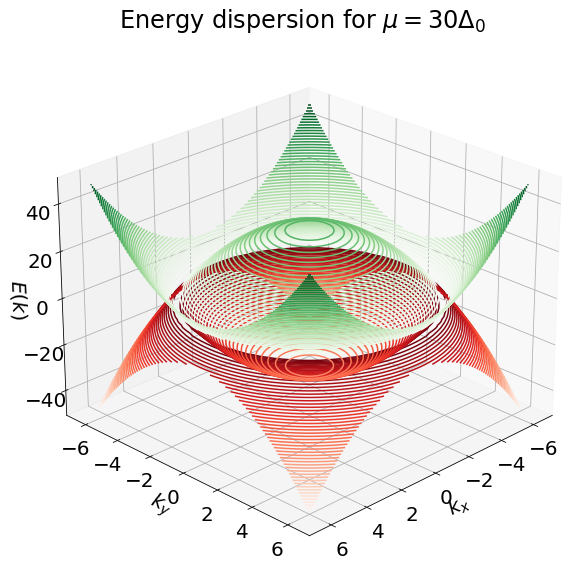

In [688]:
D=1
M=30
def eigen_energy_plus(x, y,Delta,mu):
    return np.sqrt(Delta**2 +((x ** 2 + y **2)-mu)**2)

def eigen_energy_minus(x, y,Delta,mu):
    return -np.sqrt(Delta**2 + ((x ** 2 + y ** 2)-mu)**2)

x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.linspace(-2*np.pi, 2*np.pi, 50)

X, Y = np.meshgrid(x, y)
Z_plus = eigen_energy_plus(X, Y,D,M)
Z_minus = eigen_energy_minus(X, Y,D,M)



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_plus, 50, cmap="Greens")
ax.contour3D(X, Y, Z_minus, 50, cmap="Reds")
ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$E(k)$')
ax.set_title(f"Energy dispersion for $\mu ={M}\Delta_{0}$")
ax.view_init(25, 45)

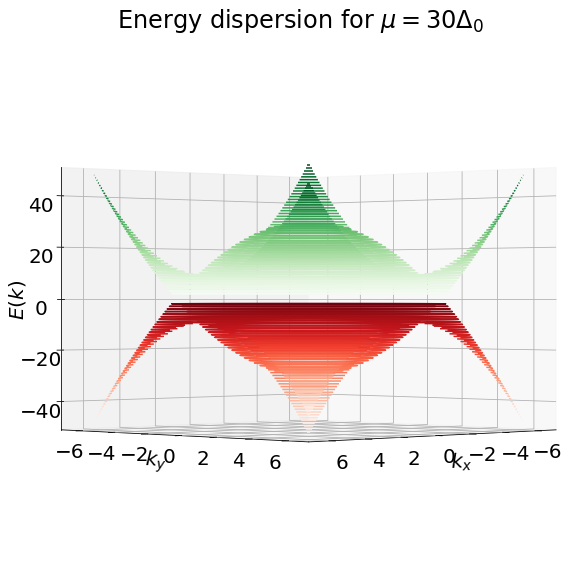

In [686]:
D=1
M=30
def eigen_energy_plus(x, y,Delta,mu):
    return np.sqrt(Delta**2 +((x ** 2 + y **2)-mu)**2)

def eigen_energy_minus(x, y,Delta,mu):
    return -np.sqrt(Delta**2 + ((x ** 2 + y ** 2)-mu)**2)

x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.linspace(-2*np.pi, 2*np.pi, 50)

X, Y = np.meshgrid(x, y)
Z_plus = eigen_energy_plus(X, Y,D,M)
Z_minus = eigen_energy_minus(X, Y,D,M)



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_plus, 50, cmap="Greens")
ax.contour3D(X, Y, Z_minus, 50, cmap="Reds")
ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$E(k)$')
ax.set_title(f"Energy dispersion for $\mu ={M}\Delta_{0}$ ")
ax.view_init(0, 45)

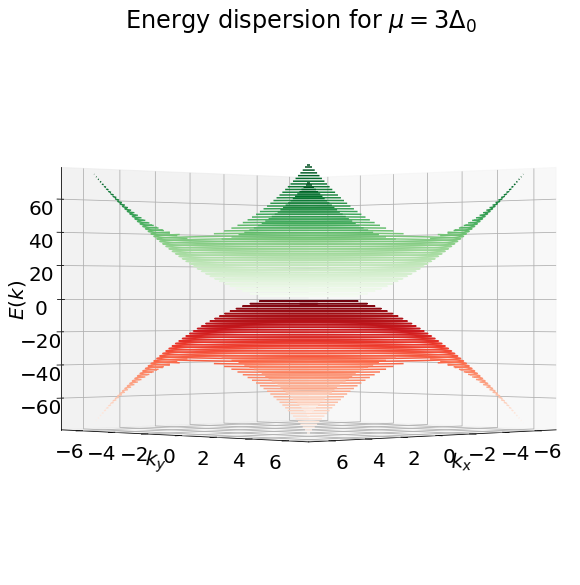

In [689]:
D=1
M=3
def eigen_energy_plus(x, y,Delta,mu):
    return np.sqrt(Delta**2 +((x ** 2 + y **2)-mu)**2)

def eigen_energy_minus(x, y,Delta,mu):
    return -np.sqrt(Delta**2 + ((x ** 2 + y ** 2)-mu)**2)

x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.linspace(-2*np.pi, 2*np.pi, 50)

X, Y = np.meshgrid(x, y)
Z_plus = eigen_energy_plus(X, Y,D,M)
Z_minus = eigen_energy_minus(X, Y,D,M)



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_plus, 50, cmap="Greens")
ax.contour3D(X, Y, Z_minus, 50, cmap="Reds")
ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$E(k)$')
ax.set_title(f"Energy dispersion for $\mu ={M}\Delta_{0}$ ")
ax.view_init(0, 45)

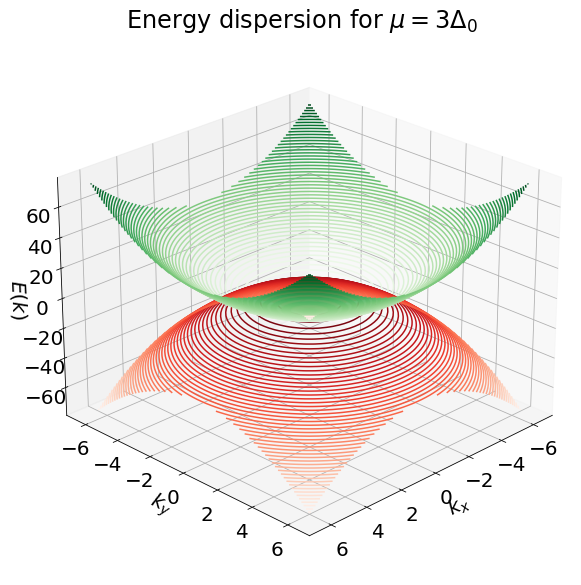

In [690]:
D=1
M=3
def eigen_energy_plus(x, y,Delta,mu):
    return np.sqrt(Delta**2 +((x ** 2 + y **2)-mu)**2)

def eigen_energy_minus(x, y,Delta,mu):
    return -np.sqrt(Delta**2 + ((x ** 2 + y ** 2)-mu)**2)

x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.linspace(-2*np.pi, 2*np.pi, 50)

X, Y = np.meshgrid(x, y)
Z_plus = eigen_energy_plus(X, Y,D,M)
Z_minus = eigen_energy_minus(X, Y,D,M)



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_plus, 50, cmap="Greens")
ax.contour3D(X, Y, Z_minus, 50, cmap="Reds")
ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$E(k)$')
ax.set_title(f"Energy dispersion for $\mu ={M}\Delta_{0}$")
ax.view_init(25, 45)